In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from image_helpers import *
from classification import *
from cnn_model import CNN
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
#Global variables
image_dir = "../training/images/"
gt_dir = "../training/groundtruth/"
files = os.listdir(image_dir)

patch_size = 16
foregroud_threshold = 0.25

In [3]:
# Loading a set of images with their groundtruth
imgs, gt_imgs = load_n_images_groundtruth(image_dir, gt_dir, 100)

In [13]:
model = CNN(patch_size, foregroud_threshold)

In [14]:
model.train(imgs, gt_imgs)

Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 443s 9ms/step - loss: 0.5055 - acc: 0.7431 - val_loss: 0.4864 - val_acc: 0.7670
Epoch 2/10
50000/50000 [==============================] - 429s 9ms/step - loss: 0.4084 - acc: 0.7963 - val_loss: 0.4204 - val_acc: 0.8100
Epoch 3/10
50000/50000 [==============================] - 429s 9ms/step - loss: 0.3373 - acc: 0.8477 - val_loss: 0.3953 - val_acc: 0.8457
Epoch 4/10
50000/50000 [==============================] - 428s 9ms/step - loss: 0.3015 - acc: 0.8655 - val_loss: 0.3846 - val_acc: 0.8308
Epoch 5/10
50000/50000 [==============================] - 441s 9ms/step - loss: 0.2767 - acc: 0.8773 - val_loss: 0.4142 - val_acc: 0.8246
Epoch 6/10
50000/50000 [==============================] - 429s 9ms/step - loss: 0.2558 - acc: 0.8870 - val_loss: 0.3774 - val_acc: 0.8446
Epoch 7/10
50000/50000 [==============================] - 446s 9ms/step - loss: 0.2361 - acc: 0.8975 - val_loss: 0.3918 - 

In [15]:
model.save_weights('cnn_weights_91_with_neighbors_12_10_2017.h5')

In [9]:
model.load_weights('cnn_weights_93_with_neighbors.h5')

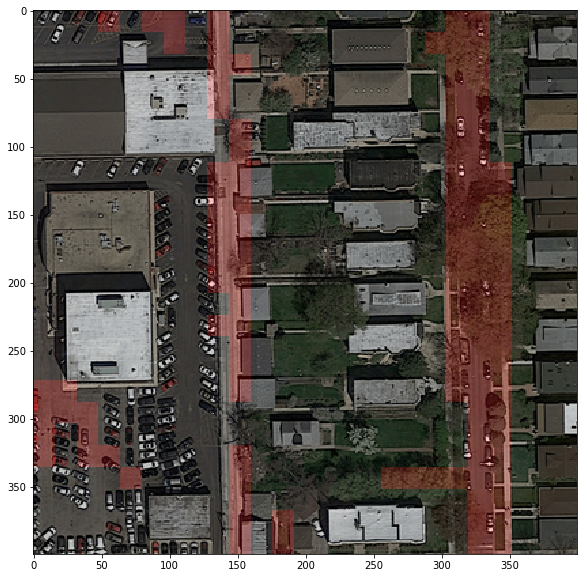

In [21]:
#Predict and Display image
img_idx = 18
#Z = model.predict(imgs[img_idx])
#print(Z)
predict_and_display_image(model, imgs[img_idx], gt_imgs[img_idx], imgs[img_idx])

In [ ]:
from classification import predict_test_set_images
predict_test_set_images('prediction_91_12_10_2017.csv', model, cnn=True)

Predicting test image number 1
Predicting test image number 2
Predicting test image number 3
Predicting test image number 4
Predicting test image number 5
Predicting test image number 6
Predicting test image number 7
Predicting test image number 8
Predicting test image number 9
Predicting test image number 10
Predicting test image number 11
Predicting test image number 12
Predicting test image number 13
Predicting test image number 14
Predicting test image number 15
Predicting test image number 16
Predicting test image number 17
Predicting test image number 18
Predicting test image number 19
Predicting test image number 20
Predicting test image number 21
Predicting test image number 22
Predicting test image number 23
Predicting test image number 24
Predicting test image number 25
Predicting test image number 26
Predicting test image number 27
Predicting test image number 28
Predicting test image number 29
Predicting test image number 30
Predicting test image number 31
Predicting test i